<div class='alert alert-success'>
    <h1>Qiskit Tutorial, Part 1: Basics </h1>
    <h4>Yen Lee Loh; started 2023-4-5, edited 2023-4-7 </h4>
</div>

If you are running this notebook for the first time, you may need to run the commands below to install dependencies!

If you have already installed the dependencies, you should comment out those lines below, or just delete them.

In [ ]:
pip install 'qiskit[visualization]'

In [ ]:
conda install -c conda-forge pylatexenc

<div class='alert alert-info'><h2>  Run this section  </h2></div>

In [35]:
import numpy as np
import qiskit
import qiskit_aer
import qiskit.visualization as qisvis

<div class='alert alert-info'><h2>  Run quantum circuit and examine state vector  </h2></div>

In [36]:
#======== Set up a quantum circuit and visualize it
circuit = qiskit.QuantumCircuit(3)    # Set up a circuit with 3 qubits 
circuit.h(0)                          # Apply a Hadamard gate to qubit q0
circuit.h(1)                          # Apply a Hadamard gate to qubit q1
circuit.ccx(0,1,2)                    # Apply a CCNOT gate with controls (q0,q1) and target q2
circuit.draw()                        # Draw the circuit

┌───┐     
q_0: ┤ H ├──■──
     ├───┤  │  
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘

In [37]:
#======== Execute the quantum circuit on a statevector simulator
simulator  = qiskit.BasicAer.get_backend('statevector_simulator')
executable = qiskit.transpile(circuit, simulator) # compile our circuit for this simulator
job        = simulator.run(executable)                   # run the circuit
result     = job.result()                             # get the result
psi        = result.get_statevector(circuit)
np.set_printoptions(precision=2,linewidth=200); print ('psi = ', np.array(psi))

psi =  [0.5-6.94e-17j 0.5-6.94e-17j 0.5-6.94e-17j 0. +0.00e+00j 0. +0.00e+00j 0. +0.00e+00j 0. +0.00e+00j 0.5-1.25e-16j]


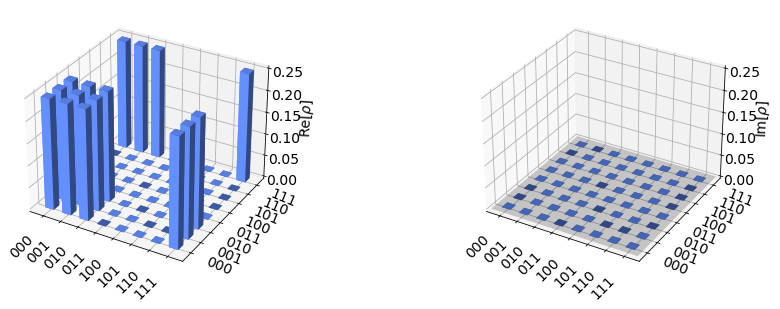

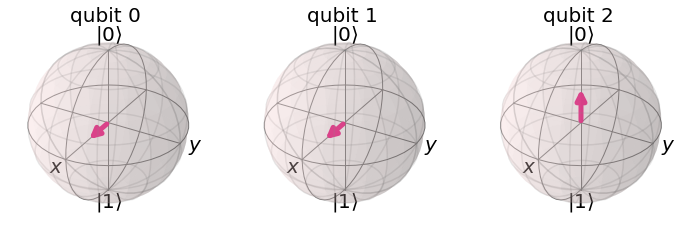

In [38]:
#======== Visualize the state vector in various ways
display(qisvis.plot_state_city(psi))
display(qisvis.plot_bloch_multivector(psi))

<div class='alert alert-info'><h2>  Run quantum circuit and examine measurement results  </h2></div>

In [40]:
#======== Set up another quantum circuit and visualize it
circuit = qiskit.QuantumCircuit(3,3)  # Set up a circuit with 3 qubits and 3 classical bits
circuit.h(0)                          # Apply a Hadamard gate to qubit q0
circuit.h(1)                          # Apply a Hadamard gate to qubit q1
circuit.ccx(0,1,2)                    # Apply a CCNOT gate with controls (q0,q1) and target q2
circuit.measure([0,1,2], [0,1,2])     # Measure qubits q0,q1,q2 and store in c0,c1,c2
circuit.draw()                        # Draw the circuit

┌───┐     ┌─┐      
q_0: ┤ H ├──■──┤M├──────
     ├───┤  │  └╥┘┌─┐   
q_1: ┤ H ├──■───╫─┤M├───
     └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ─────┤ X ├─╫──╫─┤M├
          └───┘ ║  ║ └╥┘
c: 3/═══════════╩══╩══╩═
                0  1  2

In [41]:
#======== Execute the quantum circuit on the standard Aer simulator
simulator  = qiskit_aer.AerSimulator()             # set up an ideal quantum computer simulator
executable = qiskit.transpile(circuit, simulator)  # compile our circuit for this simulator
job        = simulator.run(executable, shots=100)  # run the circuit 100 times
result     = job.result()                          # return the classical bits c0,c1,c2 from each run
counts     = result.get_counts(executable)         # get the number of times each result was obtain
#======== Execute the quantum circuit on the standard Aer simulator
print("Output = ", counts)

Output =  {'001': 31, '111': 22, '000': 22, '010': 25}


In the cell above, each bitstring represents the qubits in REVERSE order (q2,q1,q0).  You should observe four types of results.
- '000' means q0=0, q1=0, q2=0
- '001' means q0=1, q1=0, q2=0
- '010' means q0=0, q1=1, q2=0
- '111' means q0=1, q1=1, q2=1 (both controls were 1, so the CCNOT gate flipped the target qubit).